 linear regression and logistic 


SCENARIO 1: 
Predict ocean water temperature using environmental and depth-related features.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/sohier/calcofi
Target Variable:
•	Water Temperature (T_degC)
Sample Input Features
•	Depth (m)
•	Salinity
•	Oxygen
•	Latitude
•	Longitude

IN-LAB TASKS
•	Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).
•	Load the CalCOFI dataset into a Pandas DataFrame
•	Select relevant numerical features and target variable.
•	Handle missing values using mean/median imputation.
•	Perform feature scaling using StandardScaler.
•	Split the dataset into training and testing sets.
•	Train a Linear Regression model using Scikit-learn.
•	Predict water temperature for test data.
•	Evaluate model performance using:
– Mean Squared Error (MSE)
– Root Mean Squared Error (RMSE)
– R² Score
•	Visualize:
– Actual vs Predicted temperature
– Residual errors
•	Optimize model performance using:
– Feature selection
– Regularization (Ridge / Lasso)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\PRAVEENGOVIND\AppData\Local\Temp\ipykernel_27808\3009977904.py:4: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\SEM4\ml\lab\dataset\bottle.csv\bottle.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

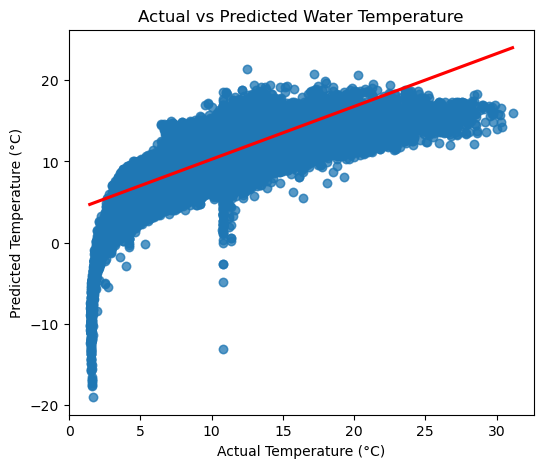

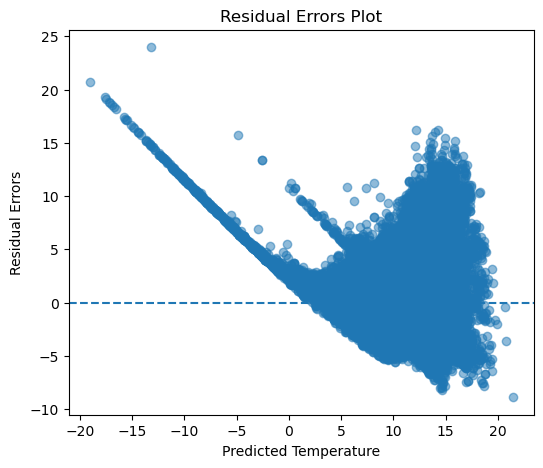


Ridge Regression R²: 0.649279200458081
Lasso Regression R²: 0.6492263454624063

Feature Importance:
O2ml_L    2.589813
Salnty    0.862655
Depthm   -1.952106
dtype: float64


In [9]:
from sklearn.impute import SimpleImputer


df = pd.read_csv(r"D:\SEM4\ml\lab\dataset\bottle.csv\bottle.csv")

df.head() 
df.info()   
df.describe()
df.tail()


features = [
    'Depthm',      # Depth (m)
    'Salnty',      # Salinity
    'O2ml_L'      # Oxygen
]

target = 'T_degC'  # Water Temperature

data = df[features + [target]]

# 4. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed[features]
y = data_imputed[target]

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# 7. Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 8. Predictions
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)

# Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Errors")
plt.title("Residual Errors Plot")
plt.show()

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\nRidge Regression R²:", r2_score(y_test, ridge_pred))

# --- Lasso Regression ---
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

feature_importance = pd.Series(lr.coef_, index=features)
print("\nFeature Importance:")
print(feature_importance.sort_values(ascending=False))

SCENARIO 2: 
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data
Target Variable (Derived):
• Price Movement
– 1 → Closing price > Opening price
– 0 → Closing price ≤ Opening price
Input Features:
• Open
• High
• Low
• Volume

IN-LAB TASKS (Logistic Regression)
•	Import required Python libraries.
•	Load LIC stock dataset into Pandas.
•	Create a binary target variable (Price Movement).
•	Handle missing values.
•	Perform feature scaling.
•	Split the dataset into training and testing sets.
•	Train a Logistic Regression model.
•	Predict stock movement for test data.
•	Evaluate classification performance using:
– Accuracy
– Precision
– Recall
– F1-Score
– Confusion Matrix
•	Visualize:
– ROC Curve
– Feature importance
•	Optimize model using:
– Hyperparameter tuning (C, penalty)
– Regularization


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Logistic Regression Performance:
Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-Score : 0.56


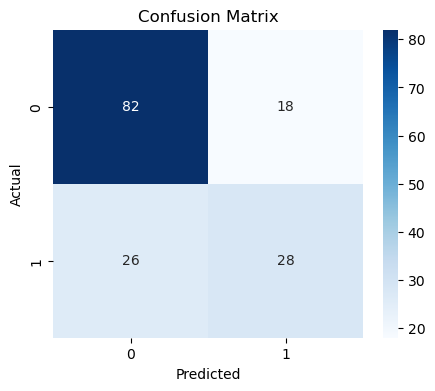

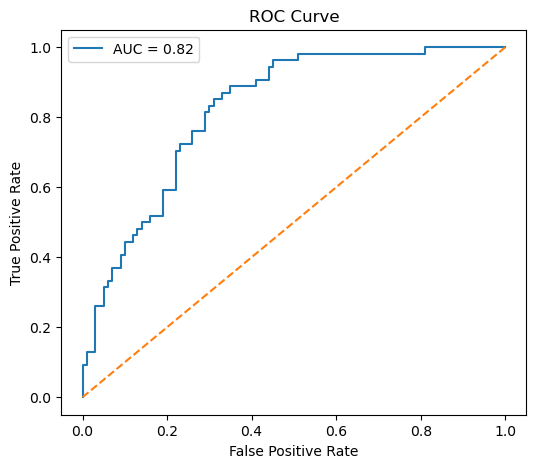

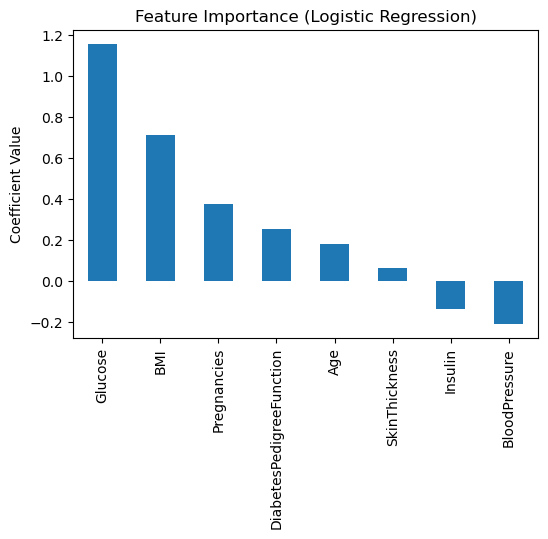


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Optimized Model Performance:
Accuracy : 0.7077922077922078
Precision: 0.5882352941176471
Recall   : 0.5555555555555556
F1-Score : 0.5714285714285714


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

df = pd.read_csv("D:\\SEM4\\ml\\lab\\dataset\\archive\\diabetes.csv")
df.head()
df.info()   
df.tail()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

data = df[features + [target]]

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(
    imputer.fit_transform(data),
    columns=data.columns
)

X = data_imputed[features]
y = data_imputed[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

feature_importance = pd.Series(
    log_reg.coef_[0],
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(6,4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.show()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("\nBest Parameters:", grid.best_params_)

best_pred = best_model.predict(X_test)

print("\nOptimized Model Performance:")
print("Accuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred))
print("Recall   :", recall_score(y_test, best_pred))
print("F1-Score :", f1_score(y_test, best_pred))